In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import chardet
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
with open('./winequality-red.csv','rb') as f:
    resultado = chardet.detect(f.read(100000))    
encoding = resultado['encoding']
print(f'este archivo .CSV tiene como encoding {encoding}')

este archivo .CSV tiene como encoding ascii


In [3]:
df = pd.read_csv('./winequality-red.csv',encoding=encoding, delimiter=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.iloc[5:31]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   
20            8.9             0.220         0.48             1.8      0.077   
21            7.6             0.390         0.31             2.3      0.082   
22            7.9             0.430         0.21             1.6      0.106   
23            8.5             0.490         0.11             2.3      0.084   
24            6.9             0.400         0.14             2.4      0.085   
25            6.3             0.390         0.16             1.4      0.080   
26            7.6             0.410         0.24             1.8      0.080   
27            7.9             0.430         0.21             1.6      0.106   
28            7.1             0.710         0.00             1.9      0.080   
29            7.8             0.645         0.00             2.0      0.082   
30            6.7             0.675         0.07             2.4      0.089   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   
20                 29.0                  60.0   0.9968  3.39       0.53   
21                 23.0                  71.0   0.9982  3.52       0.65   
22                 10.0                  37.0   0.9966  3.17       0.91   
23                  9.0                  67.0   0.9968  3.17       0.53   
24                 21.0                  40.0   0.9968  3.43       0.63   
25                 11.0                  23.0   0.9955  3.34       0.56   
26                  4.0                  11.0   0.9962  3.28       0.59   
27                 10.0                  37.0   0.9966  3.17       0.91   
28                 14.0                  35.0   0.9972  3.47       0.5

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.duplicated().sum()

240

In [10]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
corr = df.corr()

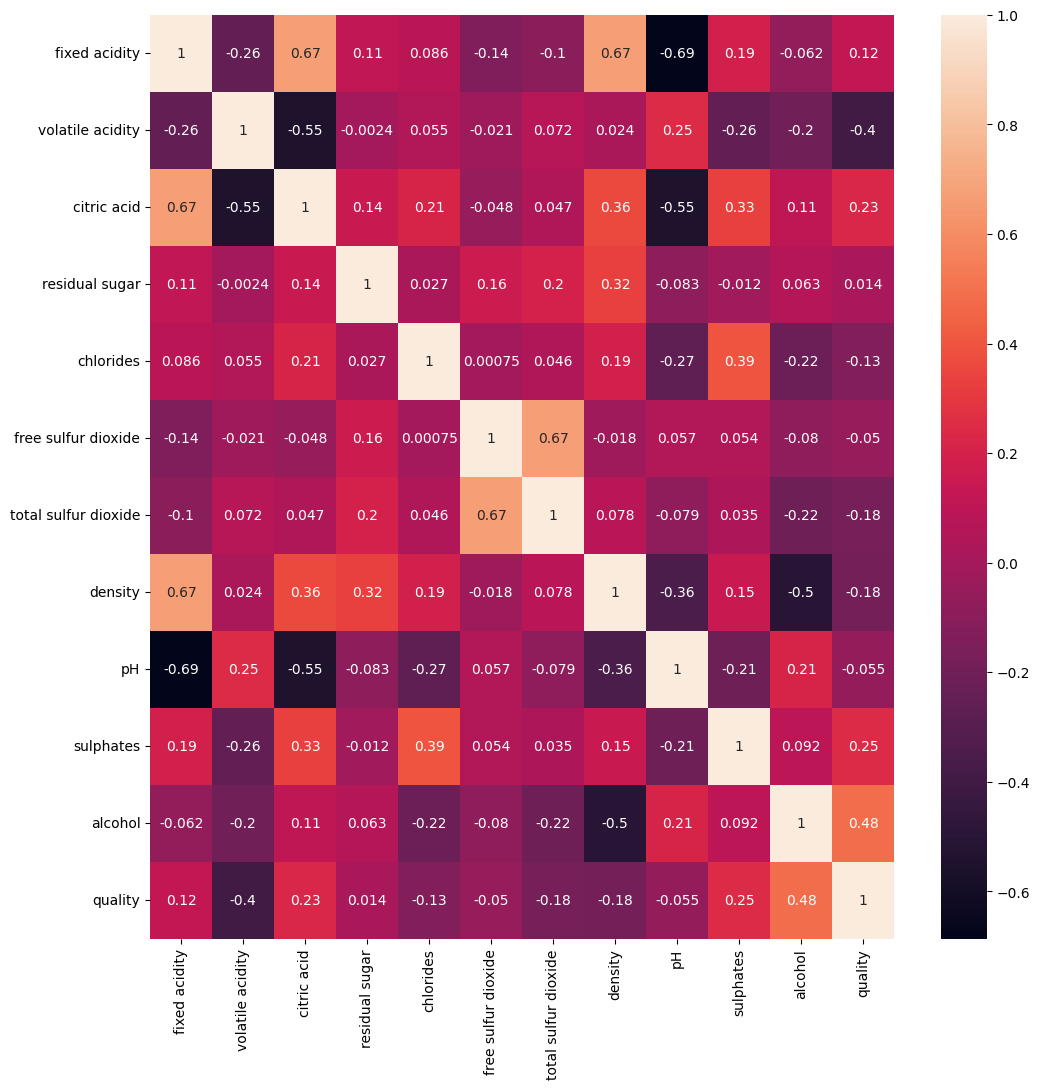

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,linecolor="black")
plt.show()

* Observamos que dentro de nuestro conjunto de datos existen algunas correlaciones mayores a 0.5 y menores a -0.5 

<Figure size 1200x1200 with 0 Axes>

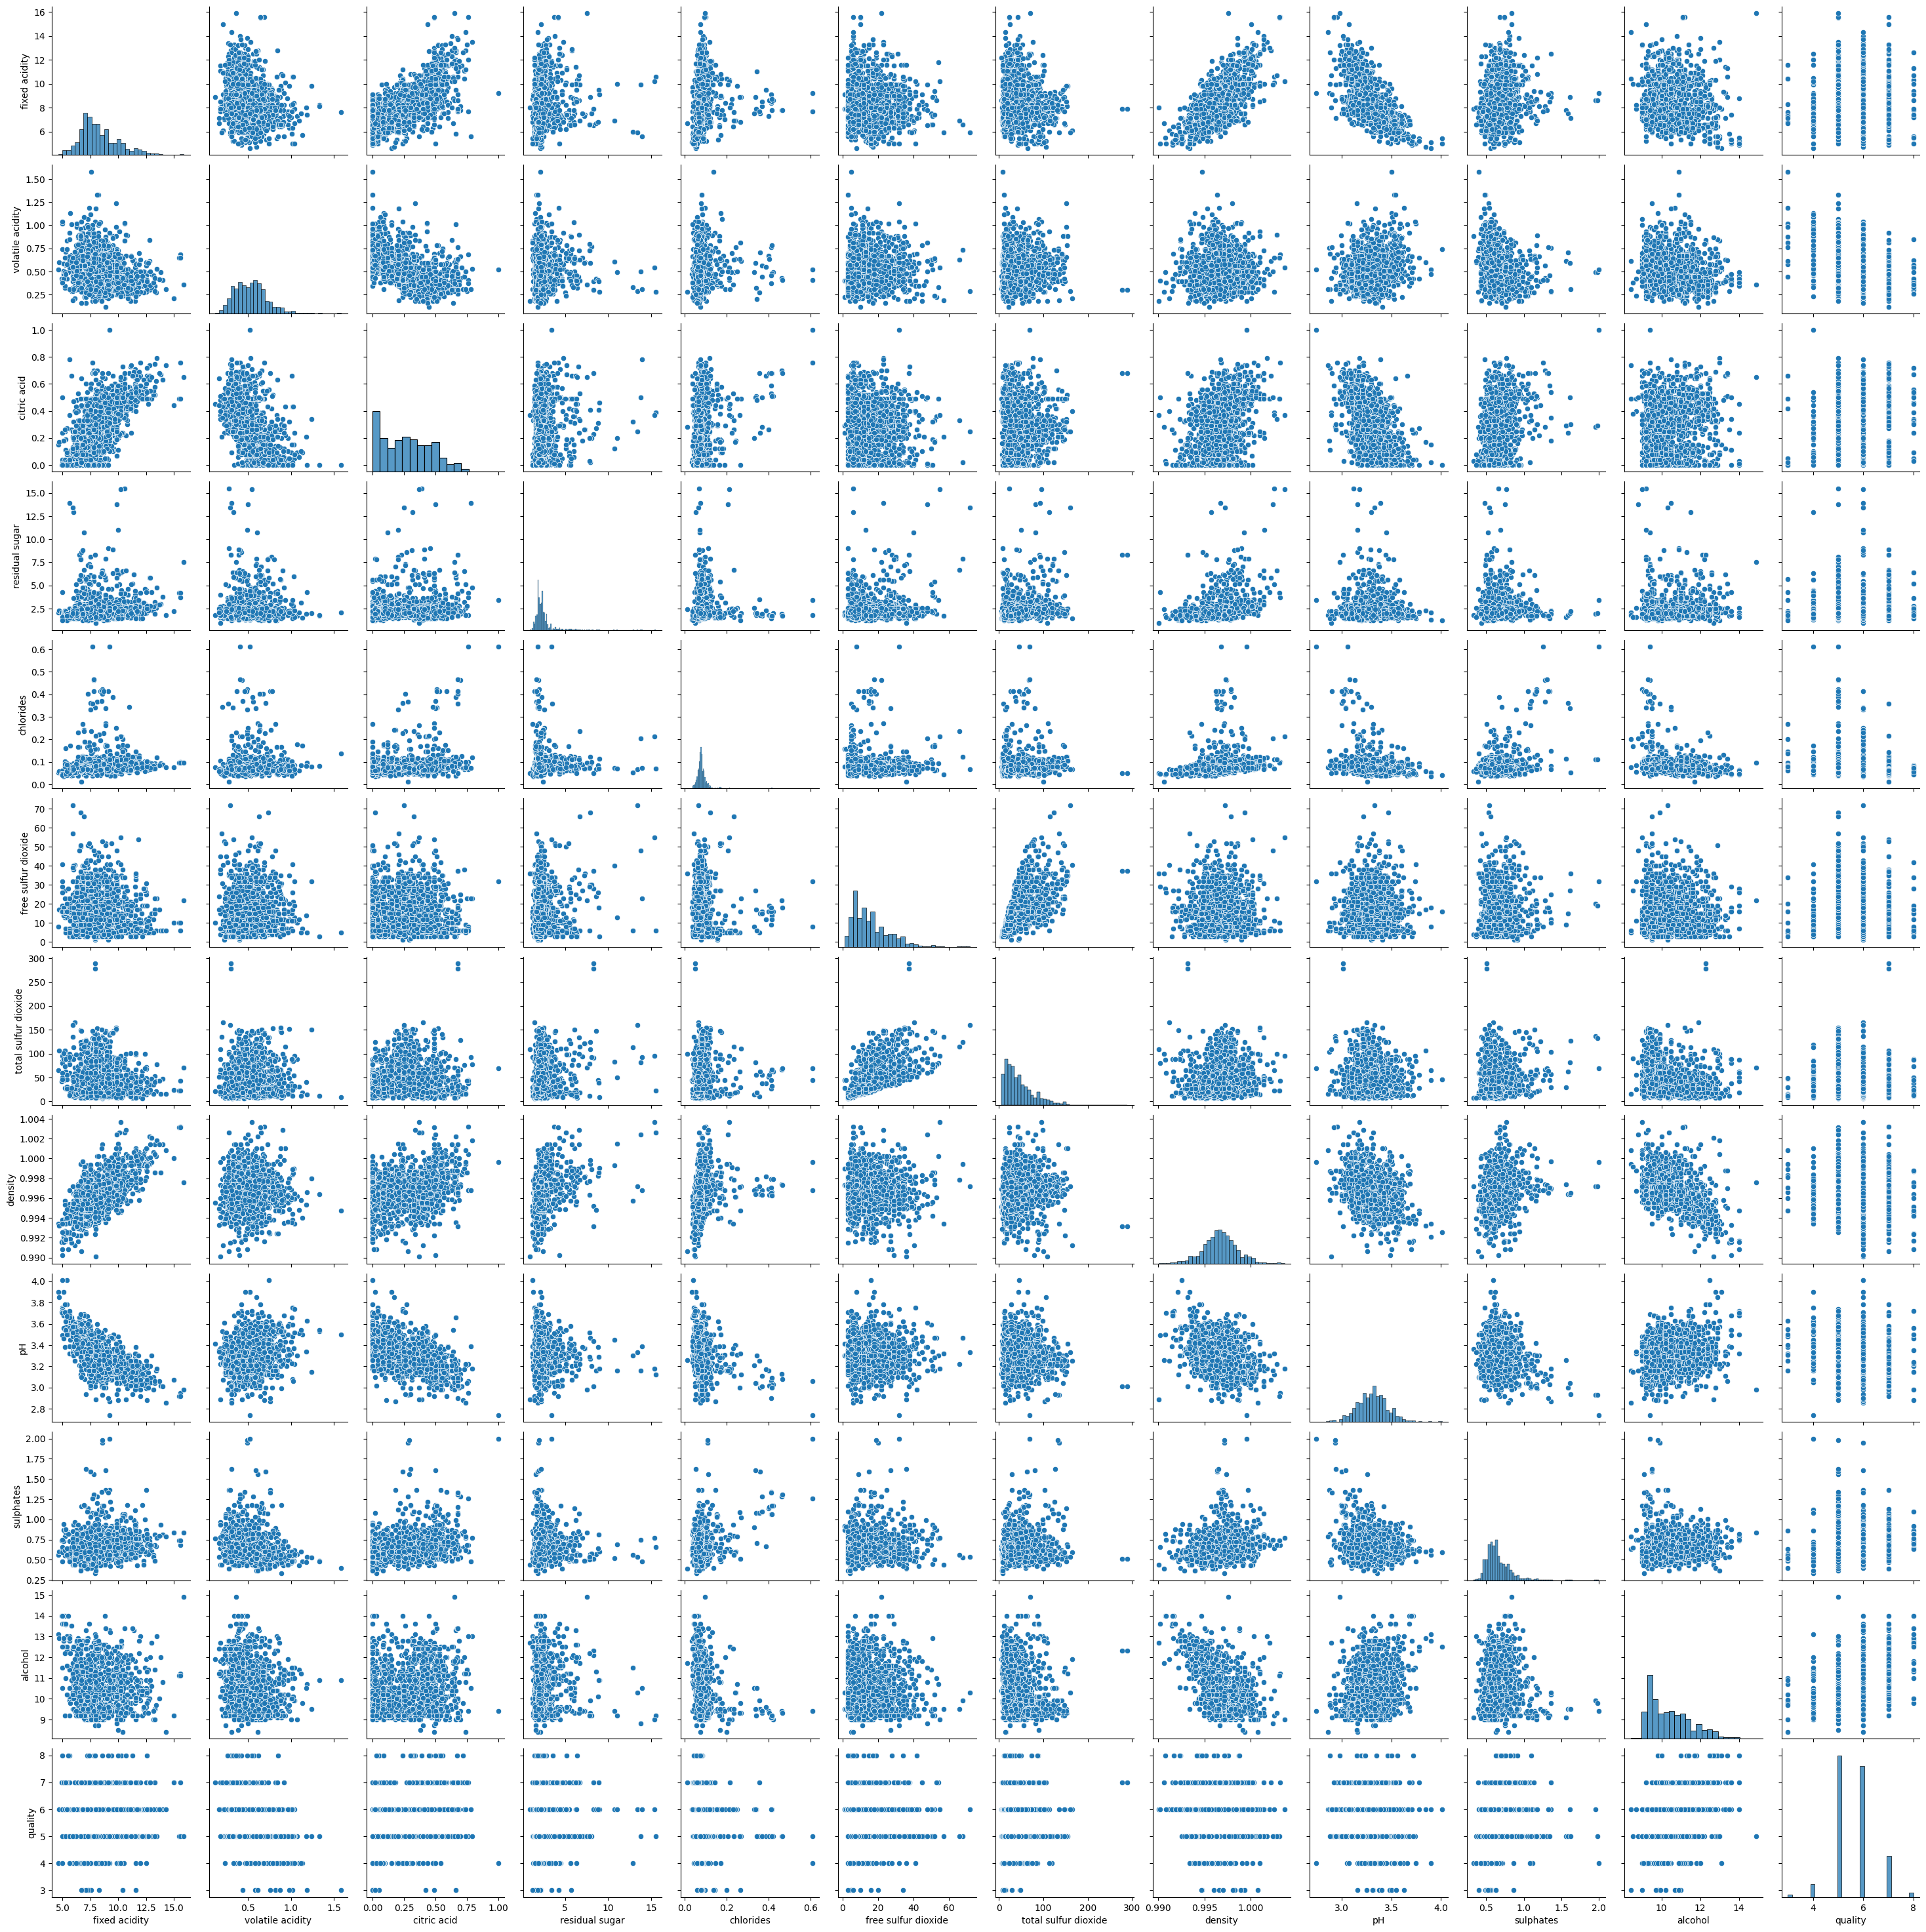

In [15]:
plt.figure(figsize=(12,12))
sns.pairplot(df)
plt.show()

In [16]:
# Describir estadísticamente la variable objetivo
descripcion = df['quality'].describe()
print('Descripción estadística de la variable objetivo "quality":\n', descripcion)

Descripción estadística de la variable objetivo "quality":
 count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


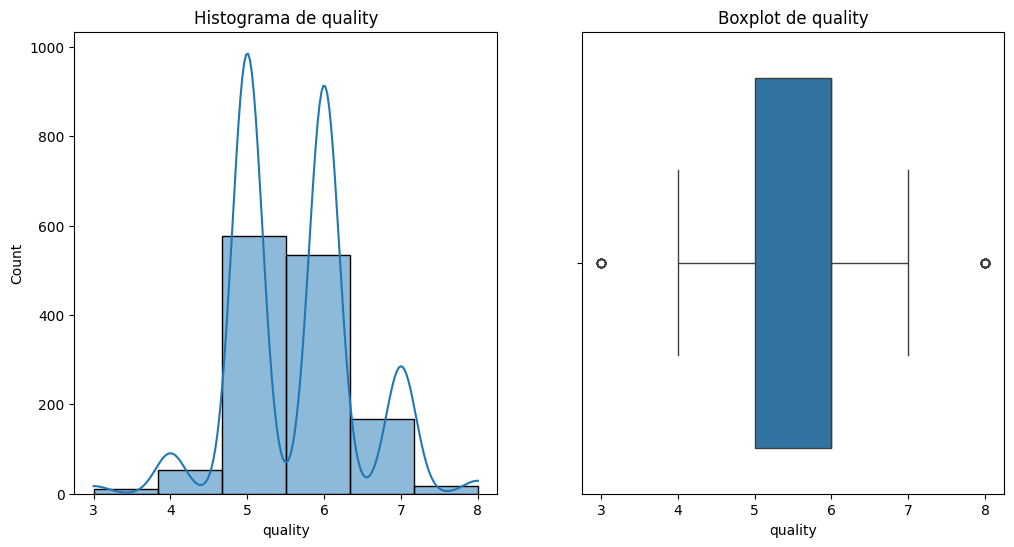

In [17]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['quality'], bins=6, kde=True)
plt.title('Histograma de quality')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['quality'])
plt.title('Boxplot de quality')

plt.show()

In [18]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([5.24560141, 5.80993501, 6.36840525, 5.15873325, 5.19928608,
       6.77639051, 5.70671729, 4.84475677, 5.79995509, 5.73940516,
       6.31682662, 5.8811928 , 5.9996561 , 5.50701065, 6.303201  ,
       5.24260556, 5.99829935, 5.3004913 , 5.21172492, 5.84721673,
       5.24978431, 6.18083232, 5.27576398, 4.7536382 , 5.77617182,
       4.78086977, 5.67494132, 5.42177579, 5.24347084, 5.39490416,
       6.0495205 , 6.35416608, 5.75837867, 4.69710175, 5.66696086,
       6.28753264, 4.83859429, 5.88995531, 5.30180927, 6.16094656,
       5.25479577, 5.76262723, 6.02609429, 4.60442536, 5.46535099,
       5.44266437, 5.07197895, 4.34884089, 5.23447957, 5.83901932,
       5.57123187, 6.05205231, 5.8957589 , 5.61986404, 6.28696279,
       5.14610584, 5.27058482, 5.24733764, 5.03081646, 6.05969272,
       4.89304458, 6.10373861, 5.17017403, 5.90151174, 5.75740602,
       5.94939493, 5.08949113, 5.47974338, 6.11642113, 6.05651297,
       5.55312376, 5.99121925, 5.94773207, 6.02915318, 5.82986

In [20]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.43100900509009576
Mean Absolute Error (MAE): 0.50414090534807
Coeficiente de Determinación (R²): 0.3915360499058209
Root Mean Squared Error (RMSE): 0.6565127607976069


In [21]:
# Resumen del modelo
print("\nIntercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: -16.888057745377072
Coeficientes: [-2.87935493e-02 -1.00079892e+00 -9.80487524e-02 -3.83233079e-03
 -2.21079042e+00  4.71614975e-03 -3.71340360e-03  2.25852219e+01
 -7.98707552e-01  8.54601686e-01  3.06154247e-01]


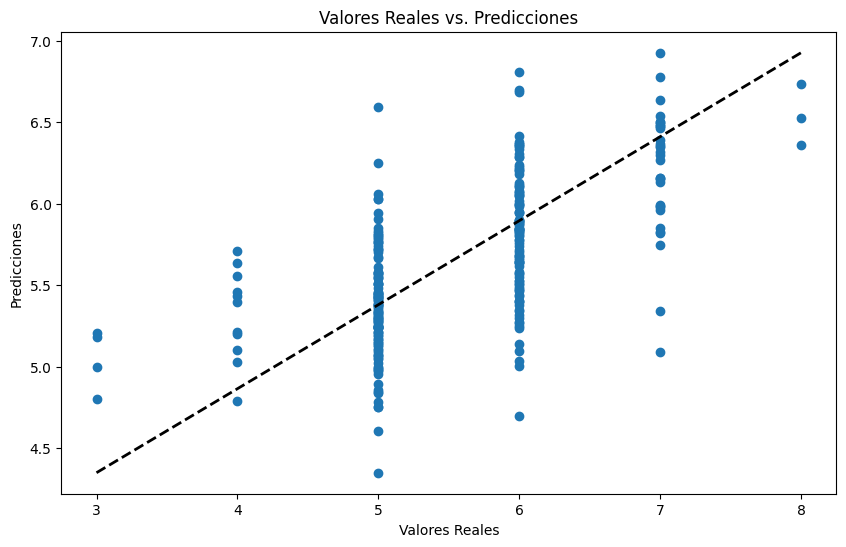

In [22]:
# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [23]:
df_test = df.copy()
df_test = df_test.sample(frac=0.8)
df_test.drop(columns='quality',inplace=True)
df_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
842            10.6             0.500         0.45             2.6      0.119   
590             9.0             0.450         0.49             2.6      0.084   
639             8.9             0.290         0.35             1.9      0.067   
1354            7.2             0.580         0.03             2.3      0.077   
814            12.6             0.410         0.54             2.8      0.103   
...             ...               ...          ...             ...        ...   
321             9.3             0.610         0.26             3.4      0.090   
1570            6.4             0.360         0.53             2.2      0.230   
7               7.3             0.650         0.00             1.2      0.065   
1094            6.6             0.725         0.09             5.5      0.117   
742             6.5             0.615         0.00             1.9      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
842                  34.0                  68.0  0.99708  3.23       0.72   
590                  21.0                  75.0  0.99870  3.35       0.57   
639                  25.0                  57.0  0.99700  3.18       1.36   
1354                  7.0                  28.0  0.99568  3.35       0.52   
814                  19.0                  41.0  0.99939  3.21       0.76   
...                   ...                   ...      ...   ...        ...   
321                  25.0                  87.0  0.99975  3.24       0.62   
1570                 19.0                  35.0  0.99340  3.37       0.93   
7                    15.0                  21.0  0.99460  3.39       0.47   
1094                  9.0                  17.0  0.99655  3.35       0.49   
742                   9.0                  18.0  0.99720  3.46       0.65   

      alcohol  
842      10.9  
590       9.7  
639      10.3  
1354     10.0  
814      11.3  
...       ...  
321       9.7  
1570     12.4  
7        10.0  
1094     10.8  
742       9.2  

[1087 rows x 11 columns]

In [24]:
df_test['quality_pred'] = model.predict(df_test)
pd.DataFrame(df_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
842            10.6             0.500         0.45             2.6      0.119   
590             9.0             0.450         0.49             2.6      0.084   
639             8.9             0.290         0.35             1.9      0.067   
1354            7.2             0.580         0.03             2.3      0.077   
814            12.6             0.410         0.54             2.8      0.103   
...             ...               ...          ...             ...        ...   
321             9.3             0.610         0.26             3.4      0.090   
1570            6.4             0.360         0.53             2.2      0.230   
7               7.3             0.650         0.00             1.2      0.065   
1094            6.6             0.725         0.09             5.5      0.117   
742             6.5             0.615         0.00             1.9      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
842                  34.0                  68.0  0.99708  3.23       0.72   
590                  21.0                  75.0  0.99870  3.35       0.57   
639                  25.0                  57.0  0.99700  3.18       1.36   
1354                  7.0                  28.0  0.99568  3.35       0.52   
814                  19.0                  41.0  0.99939  3.21       0.76   
...                   ...                   ...      ...   ...        ...   
321                  25.0                  87.0  0.99975  3.24       0.62   
1570                 19.0                  35.0  0.99340  3.37       0.93   
7                    15.0                  21.0  0.99460  3.39       0.47   
1094                  9.0                  17.0  0.99655  3.35       0.49   
742                   9.0                  18.0  0.99720  3.46       0.65   

      alcohol  quality_pred  
842      10.9      5.788841  
590       9.7      5.316270  
639      10.3      6.575190  
1354     10.0      5.389135  
814      11.3      6.101419  
...       ...           ...  
321       9.7      5.282331  
1570     12.4      6.293742  
7        10.0      5.314539  
1094     10.8      5.443932  
742       9.2      5.264479  

[1087 rows x 12 columns]

In [25]:
result_merge = pd.merge(df, df_test, left_index=True, right_index=True, how='inner')
result_merge

fixed acidity_x  volatile acidity_x  citric acid_x  residual sugar_x  \
0                 7.4               0.700           0.00               1.9   
2                 7.8               0.760           0.04               2.3   
5                 7.4               0.660           0.00               1.8   
6                 7.9               0.600           0.06               1.6   
7                 7.3               0.650           0.00               1.2   
...               ...                 ...            ...               ...   
1593              6.8               0.620           0.08               1.9   
1594              6.2               0.600           0.08               2.0   
1595              5.9               0.550           0.10               2.2   
1597              5.9               0.645           0.12               2.0   
1598              6.0               0.310           0.47               3.6   

      chlorides_x  free sulfur dioxide_x  total sulfur dioxide_x  density_x  \
0           0.076                   11.0                    34.0    0.99780   
2           0.092                   15.0                    54.0    0.99700   
5           0.075                   13.0                    40.0    0.99780   
6           0.069                   15.0                    59.0    0.99640   
7           0.065                   15.0                    21.0    0.99460   
...           ...                    ...                     ...        ...   
1593        0.068                   28.0                    38.0    0.99651   
1594        0.090                   32.0                    44.0    0.99490   
1595        0.062                   39.0                    51.0    0.99512   
1597        0.075                   32.0                    44.0    0.99547   
1598        0.067                   18.0                    42.0    0.99549   

      pH_x  sulphates_x  ...  citric acid_y  residual sugar_y  chlorides_y  \
0     3.51         0.56  ...           0.00               1.9        0.076   
2     3.26         0.65  ...           0.04               2.3        0.092   
5     3.51         0.56  ...           0.00               1.8        0.075   
6     3.30         0.46  ...           0.06               1.6        0.069   
7     3.39         0.47  ...           0.00               1.2        0.065   
...    ...          ...  ...            ...               ...          ...   
1593  3.42         0.82  ...           0.08               1.9        0.068   
1594  3.45         0.58  ...           0.08               2.0        0.090   
1595  3.52         0.76  ...           0.10               2.2        0.062   
1597  3.57         0.71  ...           0.12               2.0        0.075   
1598  3.39         0.66  ...           0.47               3.6        0.067   

      free sulfur dioxide_y  total sulfur dioxide_y  density_y  pH_y  \
0                      11.0                    34.0    0.99780  3.51   
2                      15.0                    54.0    0.99700  3.26   
5                      13.0                    40.0    0.99780  3.51   
6                      15.0                    59.0    0.99640  3.30   
7                      15.0                    21.0    0.99460  3.39   
...                     ...                     ...        ...   ...   
1593                   28.0                    38.0    0.99651  3.42   
1594                   32.0                    44.0    0.99490  3.45   
1595                   39.0                    51.0    0.99512  3.52   
1597                   32.0                    44.0    0.99547  3.57   
1598                   18.0                    42.0    0.99549  3.39   

      sulphates_y  alcohol_y  quality_pred  
0            0.56        9.4      5.037129  
2            0.65        9.8      5.250317  
5            0.56        9.4      5.066907  
6            0.46        9.4      5.110233  
7            0.47       10.0      5.314539  
...           ...        ...           ...  
159

In [26]:
comparacion = result_merge[['quality','quality_pred']].copy()
comparacion['diferencia'] = comparacion['quality_pred'] - comparacion['quality']
comparacion

quality  quality_pred  diferencia
0           5      5.037129    0.037129
2           5      5.250317    0.250317
5           5      5.066907    0.066907
6           5      5.110233    0.110233
7           7      5.314539   -1.685461
...       ...           ...         ...
1593        6      5.505193   -0.494807
1594        5      5.530775    0.530775
1595        6      5.972842   -0.027158
1597        5      5.459898    0.459898
1598        6      6.057337    0.057337

[1087 rows x 3 columns]

In [27]:
x1= comparacion['quality']
x2= comparacion['quality_pred']
y= comparacion.index

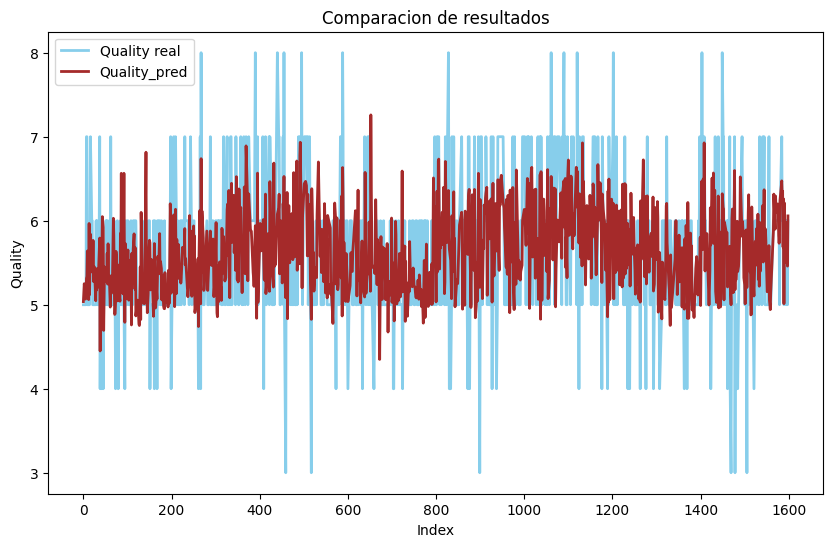

In [28]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Quality real
plt.plot(y, x1, label='Quality real', color='skyblue', linewidth=2)
# Predicciones
plt.plot(y, x2, label='Quality_pred', color='brown', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title('Comparacion de resultados')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

### REGRESION LINEAL DATA SIN OUTLIER 

In [29]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
df = df.copy()

Q1 = df['quality'].quantile(0.25)
Q3 = df['quality'].quantile(0.75)

# Calcular el IQR (Inter Quartile Range)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para excluir los outliers
df_sin_otl = df[(df['quality'] >= lower_bound) & (df['quality'] <= upper_bound)]
df_sin_otl

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1332 rows x 12 columns]

In [30]:
df_sin_otl.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1332.000000       1332.000000  1332.000000     1332.000000   
mean        8.308559          0.528112     0.271682        2.521884   
std         1.732953          0.179145     0.194572        1.353150   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.100000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.422500        2.600000   
max        15.900000          1.330000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1332.000000          1332.000000           1332.000000  1332.000000   
mean      0.088118            15.957207             47.148273     0.996724   
std       0.049419            10.437340             33.514162     0.001852   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            22.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

               pH    sulphates      alcohol      quality  
count  1332.00000  1332.000000  1332.000000  1332.000000  
mean      3.30958     0.657890    10.413864     5.612613  
std       0.15429     0.170958     1.063854     0.753708  
min       2.74000     0.330000     8.400000     4.000000  
25%       3.21000     0.550000     9.500000     5.000000  
50%       3.31000     0.620000    10.100000     6.000000  
75%       3.40000     0.730000    11.100000     6.000000  
max       4.01000     2.000000    14.900000     7.000000

In [31]:
df_corr = df_sin_otl.corr()

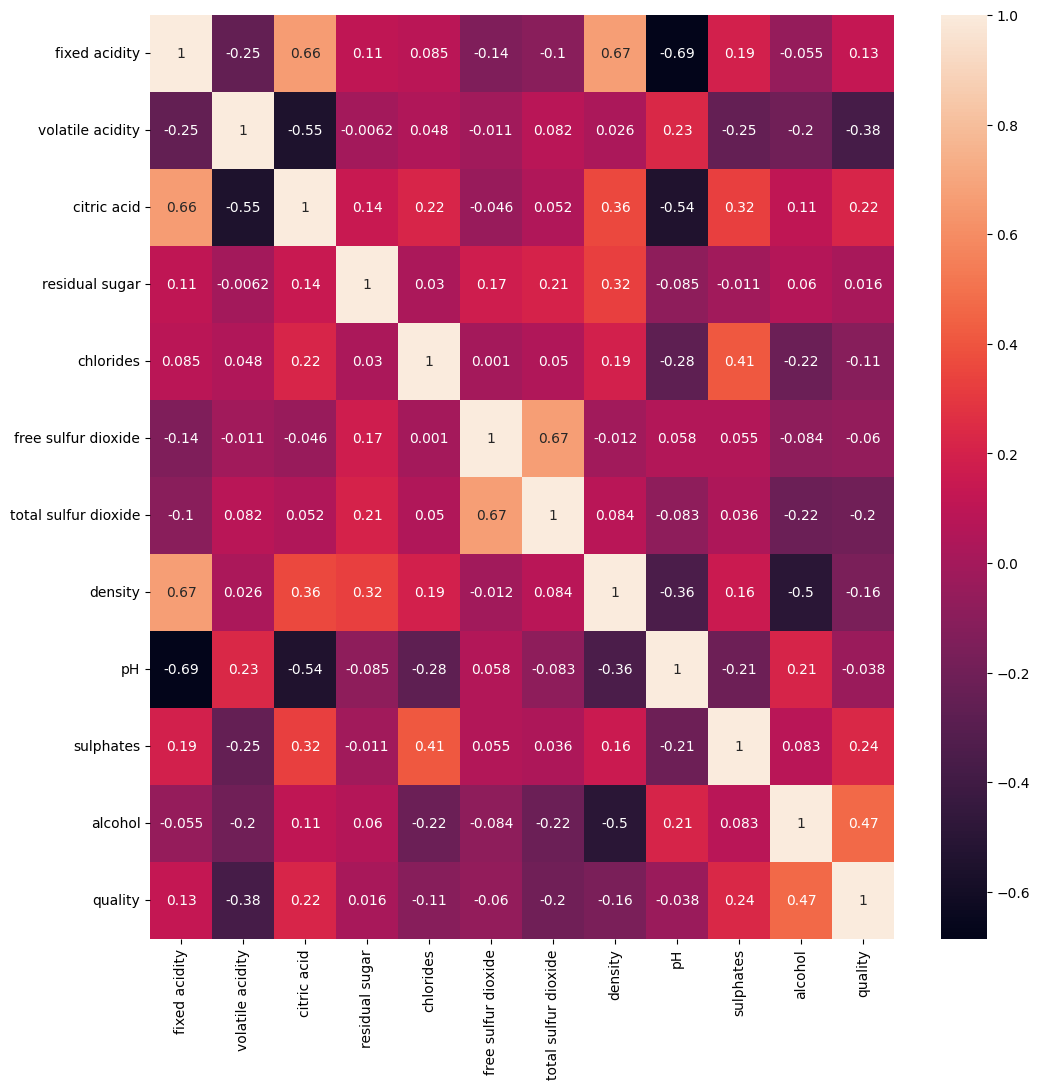

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True)
plt.show()

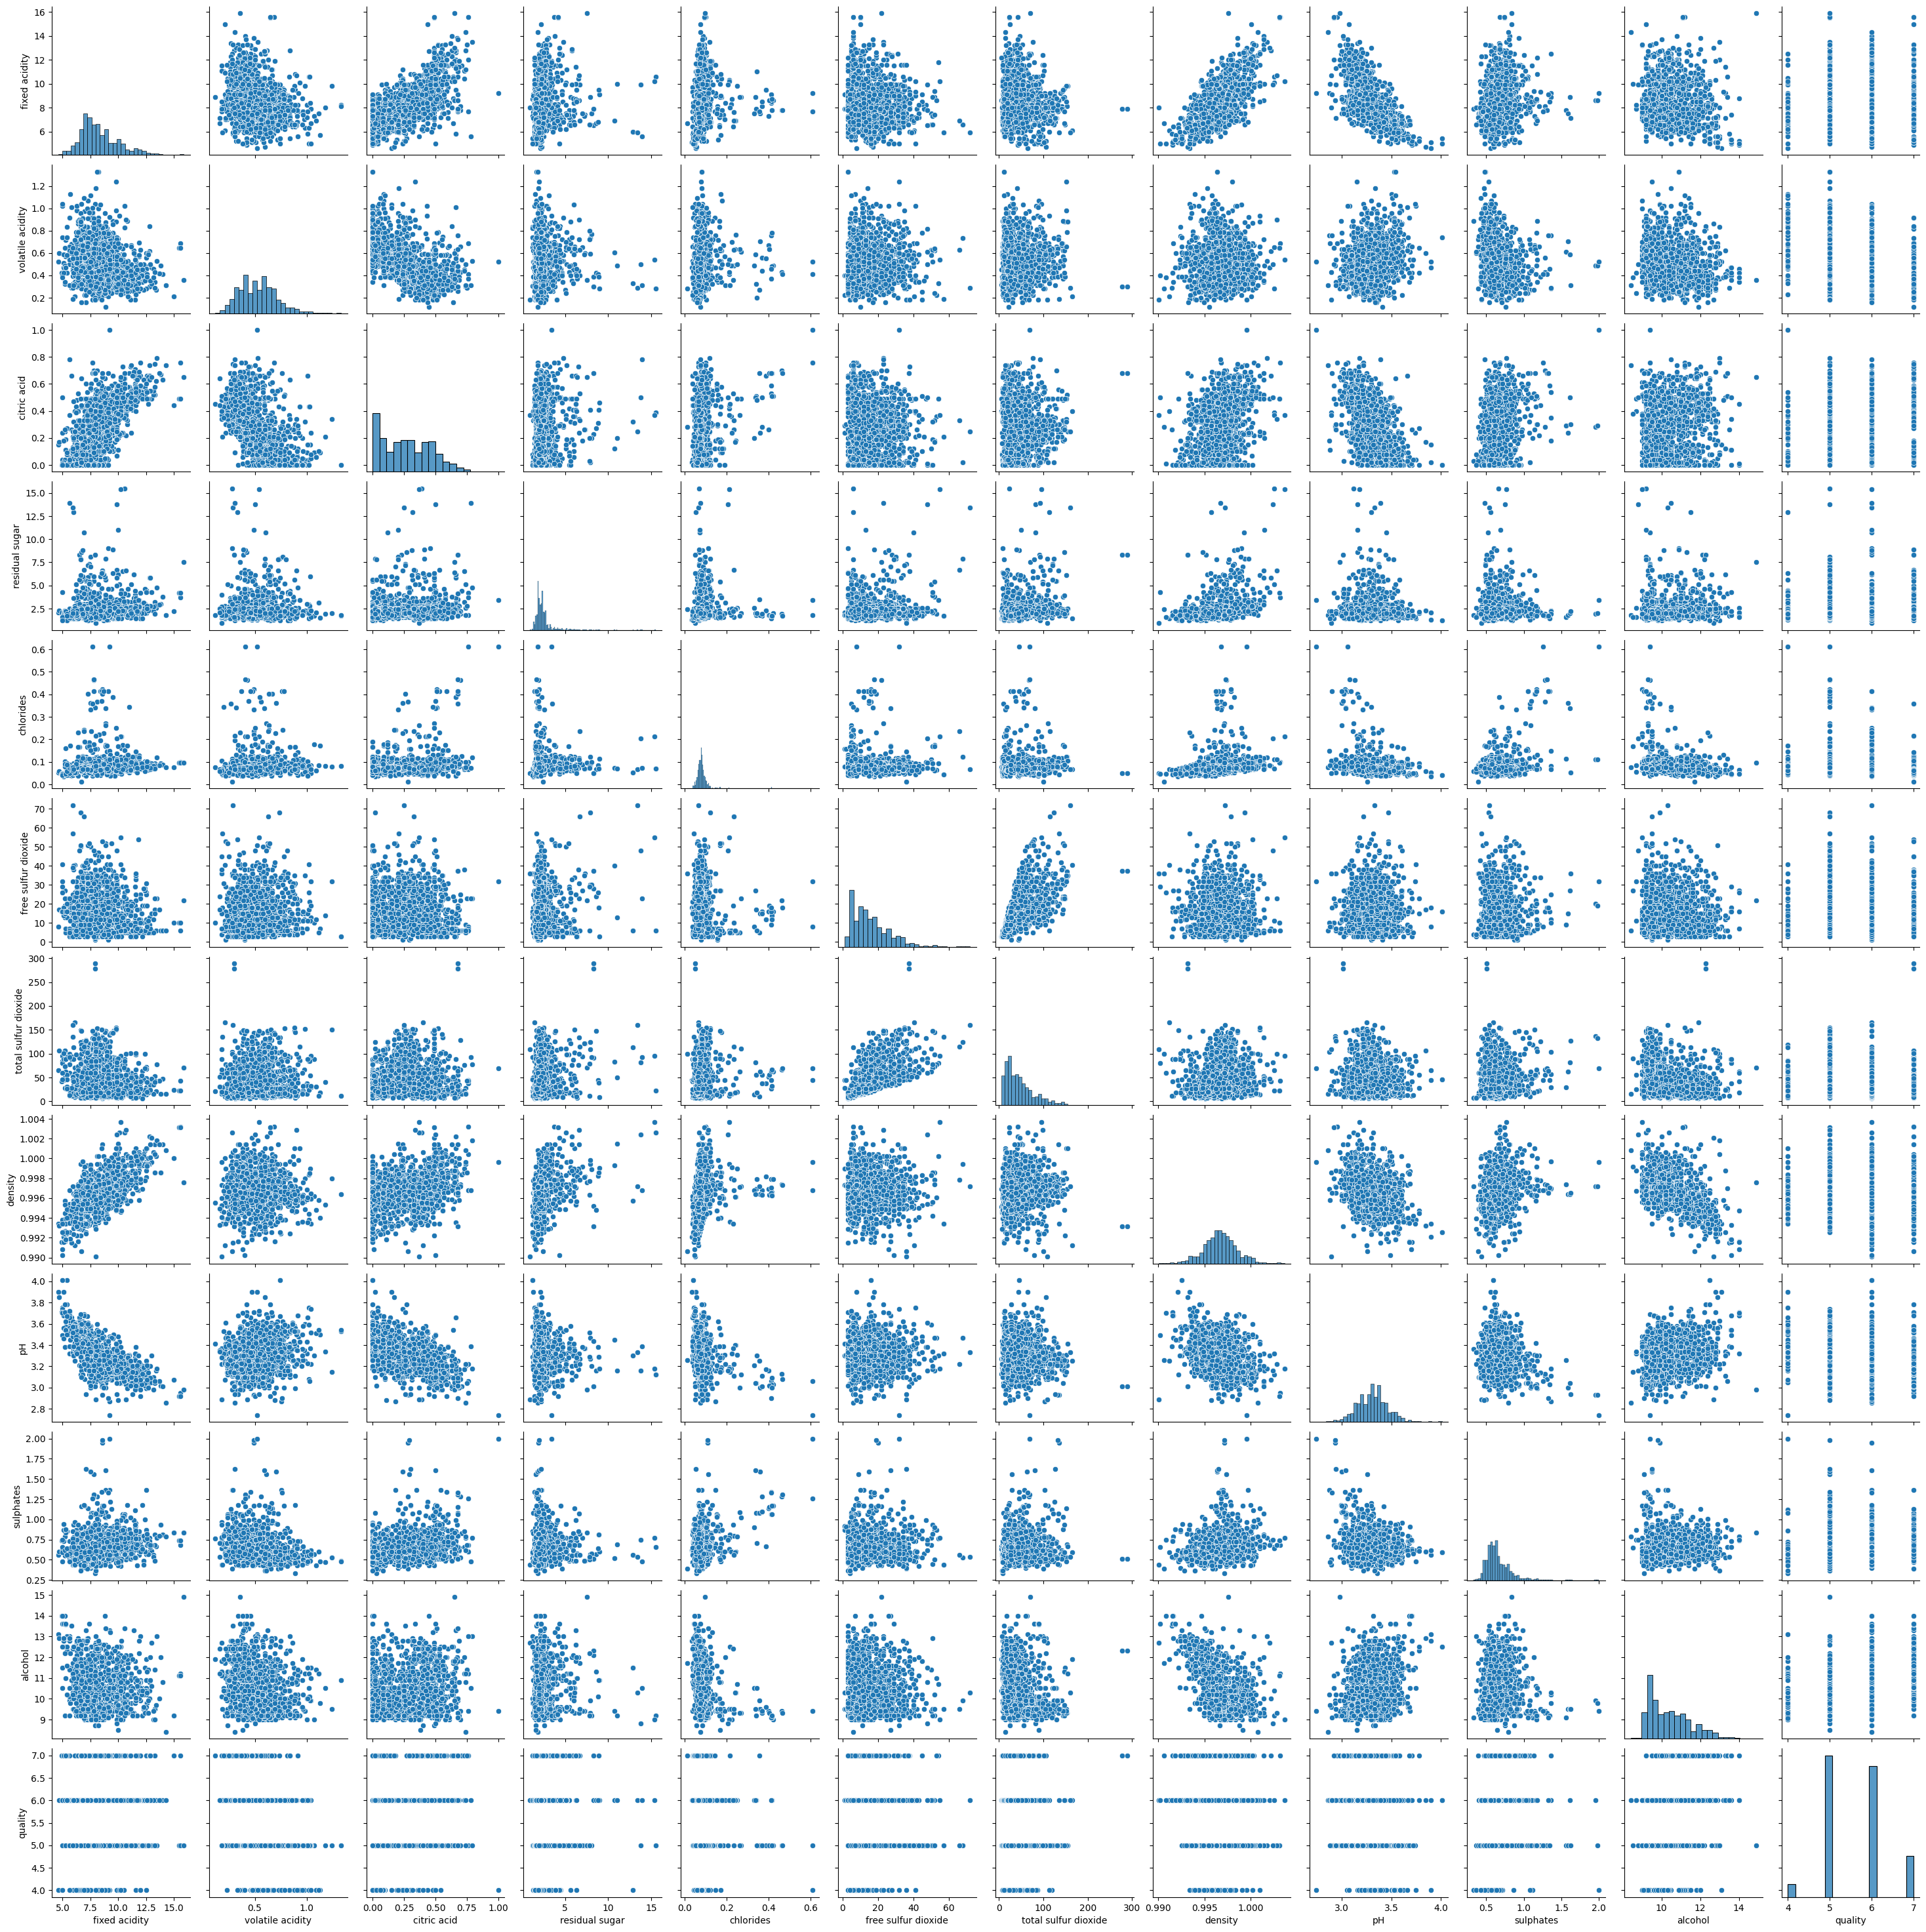

In [33]:
sns.pairplot(df_sin_otl)
plt.show()

In [35]:
# Descripcion de la variable objetivo sin otl 
descripcion = df['quality'].describe()
print('Descripcion estadistica de la variable "Quality"' , descripcion)


Descripcion estadistica de la variable "Quality" count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


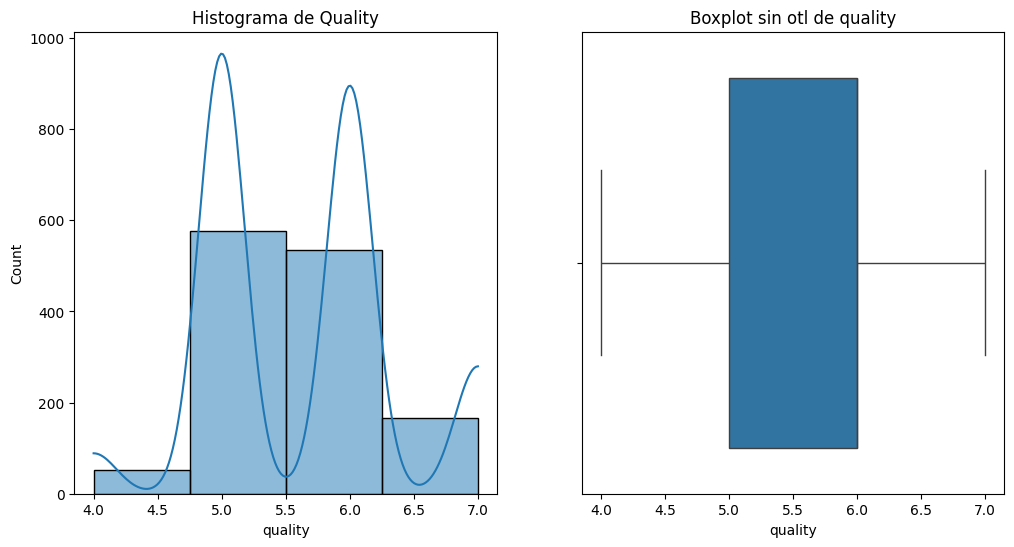

In [37]:
# Visualizar la distribucion de la variable 
plt.figure(figsize=(12,6)) # Crea la figura

plt.subplot(1,2,1) # Crea el primer grafico 
sns.histplot(df_sin_otl['quality'],bins=4, kde= True)
plt.title('Histograma de Quality')

plt.subplot(1,2,2) # Crea el segundo grafico 
sns.boxplot(x=df_sin_otl['quality'])
plt.title('Boxplot sin otl de quality')
plt.show()

In [38]:
# Dividir lo datos en caracteristicas  (X) y objetivo (y)
X = df_sin_otl.drop('quality',axis=1)
y = df_sin_otl['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([5.86473768, 6.31818302, 5.92792246, 5.43428943, 5.69681232,
       5.16199421, 5.18525597, 5.25461655, 6.08306194, 5.80463147,
       5.36789818, 5.7927324 , 5.07671333, 6.33512534, 6.31443612,
       5.48131924, 5.11543147, 5.32288642, 5.12624155, 5.14410555,
       6.08717496, 6.4924555 , 5.41962609, 4.98681067, 6.17885608,
       5.25204241, 6.02624159, 5.89570926, 6.04629722, 5.88475695,
       5.68243165, 6.41829574, 5.60171652, 6.07315534, 4.69409574,
       5.54507821, 5.23570443, 5.01491139, 6.01696531, 6.27804304,
       5.80912274, 6.25473791, 5.69107374, 6.2717258 , 5.26811549,
       5.01901424, 5.56695413, 5.68503154, 6.02479691, 5.11011825,
       5.6181028 , 4.98762564, 6.08250053, 5.41669903, 5.39932173,
       5.306852  , 5.66777654, 5.90318288, 6.13937784, 5.52182638,
       5.74552388, 5.62570369, 6.38956746, 5.77810576, 5.70387536,
       5.39239732, 5.41625019, 5.13530043, 5.71662419, 4.37613926,
       5.54657475, 5.70971836, 6.24589031, 5.23004175, 5.73551

In [40]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coeficiente de Determinación (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.38517859716340624
Mean Absolute Error (MAE): 0.49264742202580114
Coeficiente de Determinación (R²): 0.3140052709807617
Root Mean Squared Error (RMSE): 0.6206275833085461


In [41]:
# Resumen del modelo
print("\nIntercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 15.25181004803558
Coeficientes: [ 2.58217863e-02 -1.03012573e+00 -6.33089539e-02  5.98857364e-03
 -1.46742768e+00  5.37762305e-03 -3.31214014e-03 -1.14043087e+01
 -2.45833618e-01  6.94896320e-01  2.51551205e-01]


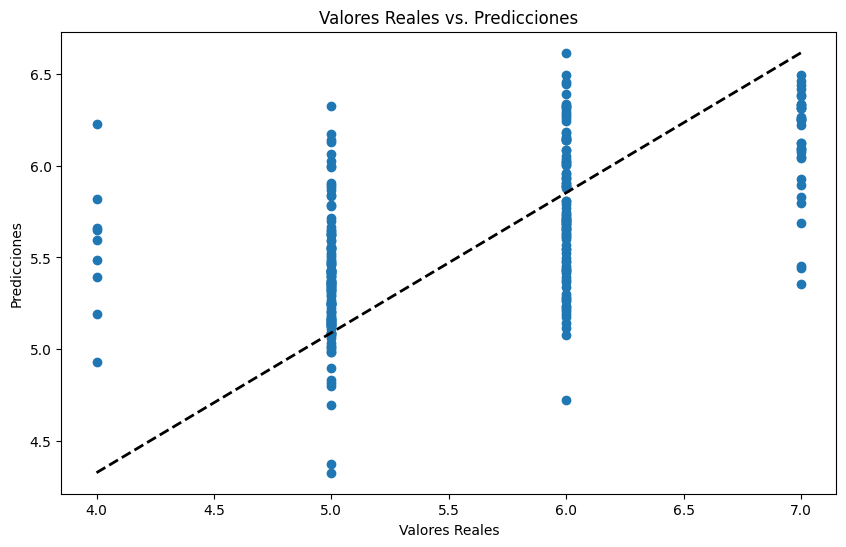

In [42]:
# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [43]:
df_test = df_sin_otl.copy()
df_test = df_test.sample(frac=0.8)
df_test.drop(columns='quality',inplace=True)
df_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
778             8.3              0.43         0.30             3.4      0.079   
878             8.8              0.61         0.19             4.0      0.094   
601            13.2              0.46         0.52             2.2      0.071   
527             7.0              0.38         0.49             2.5      0.097   
1182           10.2              0.40         0.40             2.5      0.068   
...             ...               ...          ...             ...        ...   
439             7.0              0.62         0.18             1.5      0.062   
1046            7.6              0.78         0.00             1.7      0.076   
1124            6.5              0.58         0.00             2.2      0.096   
269            11.5              0.18         0.51             4.0      0.104   
1508            7.1              0.27         0.60             2.1      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
778                   7.0                  34.0  0.99788  3.36       0.61   
878                  30.0                  69.0  0.99787  3.22       0.50   
601                  12.0                  35.0  1.00060  3.10       0.56   
527                  33.0                  85.0  0.99620  3.39       0.77   
1182                 41.0                  54.0  0.99754  3.38       0.86   
...                   ...                   ...      ...   ...        ...   
439                   7.0                  50.0  0.99510  3.08       0.60   
1046                 33.0                  45.0  0.99612  3.31       0.62   
1124                  3.0                  13.0  0.99557  3.62       0.62   
269                   4.0                  23.0  0.99960  3.28       0.97   
1508                 17.0                  25.0  0.99814  3.38       0.72   

      alcohol  
778      10.5  
878      10.0  
601       9.0  
527      11.4  
1182     10.5  
...       ...  
439       9.3  
1046     10.7  
1124     11.5  
269      10.1  
1508     10.6  

[1066 rows x 11 columns]

In [44]:
df_test['quality_pred'] = model.predict(df_test)
pd.DataFrame(df_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
778             8.3              0.43         0.30             3.4      0.079   
878             8.8              0.61         0.19             4.0      0.094   
601            13.2              0.46         0.52             2.2      0.071   
527             7.0              0.38         0.49             2.5      0.097   
1182           10.2              0.40         0.40             2.5      0.068   
...             ...               ...          ...             ...        ...   
439             7.0              0.62         0.18             1.5      0.062   
1046            7.6              0.78         0.00             1.7      0.076   
1124            6.5              0.58         0.00             2.2      0.096   
269            11.5              0.18         0.51             4.0      0.104   
1508            7.1              0.27         0.60             2.1      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
778                   7.0                  34.0  0.99788  3.36       0.61   
878                  30.0                  69.0  0.99787  3.22       0.50   
601                  12.0                  35.0  1.00060  3.10       0.56   
527                  33.0                  85.0  0.99620  3.39       0.77   
1182                 41.0                  54.0  0.99754  3.38       0.86   
...                   ...                   ...      ...   ...        ...   
439                   7.0                  50.0  0.99510  3.08       0.60   
1046                 33.0                  45.0  0.99612  3.31       0.62   
1124                  3.0                  13.0  0.99557  3.62       0.62   
269                   4.0                  23.0  0.99960  3.28       0.97   
1508                 17.0                  25.0  0.99814  3.38       0.72   

      alcohol  quality_pred  
778      10.5      5.692691  
878      10.0      5.348802  
601       9.0      5.423340  
527      11.4      5.987060  
1182     10.5      6.066358  
...       ...           ...  
439       9.3      5.223297  
1046     10.7      5.520293  
1124     11.5      5.747525  
269      10.1      6.156359  
1508     10.6      5.984382  

[1066 rows x 12 columns]

In [45]:
result_merge = pd.merge(df, df_test, left_index=True, right_index=True, how='inner')
result_merge

fixed acidity_x  volatile acidity_x  citric acid_x  residual sugar_x  \
3                11.2               0.280           0.56               1.9   
5                 7.4               0.660           0.00               1.8   
6                 7.9               0.600           0.06               1.6   
7                 7.3               0.650           0.00               1.2   
8                 7.8               0.580           0.02               2.0   
...               ...                 ...            ...               ...   
1592              6.3               0.510           0.13               2.3   
1593              6.8               0.620           0.08               1.9   
1594              6.2               0.600           0.08               2.0   
1597              5.9               0.645           0.12               2.0   
1598              6.0               0.310           0.47               3.6   

      chlorides_x  free sulfur dioxide_x  total sulfur dioxide_x  density_x  \
3           0.075                   17.0                    60.0    0.99800   
5           0.075                   13.0                    40.0    0.99780   
6           0.069                   15.0                    59.0    0.99640   
7           0.065                   15.0                    21.0    0.99460   
8           0.073                    9.0                    18.0    0.99680   
...           ...                    ...                     ...        ...   
1592        0.076                   29.0                    40.0    0.99574   
1593        0.068                   28.0                    38.0    0.99651   
1594        0.090                   32.0                    44.0    0.99490   
1597        0.075                   32.0                    44.0    0.99547   
1598        0.067                   18.0                    42.0    0.99549   

      pH_x  sulphates_x  ...  citric acid_y  residual sugar_y  chlorides_y  \
3     3.16         0.58  ...           0.56               1.9        0.075   
5     3.51         0.56  ...           0.00               1.8        0.075   
6     3.30         0.46  ...           0.06               1.6        0.069   
7     3.39         0.47  ...           0.00               1.2        0.065   
8     3.36         0.57  ...           0.02               2.0        0.073   
...    ...          ...  ...            ...               ...          ...   
1592  3.42         0.75  ...           0.13               2.3        0.076   
1593  3.42         0.82  ...           0.08               1.9        0.068   
1594  3.45         0.58  ...           0.08               2.0        0.090   
1597  3.57         0.71  ...           0.12               2.0        0.075   
1598  3.39         0.66  ...           0.47               3.6        0.067   

      free sulfur dioxide_y  total sulfur dioxide_y  density_y  pH_y  \
3                      17.0                    60.0    0.99800  3.16   
5                      13.0                    40.0    0.99780  3.51   
6                      15.0                    59.0    0.99640  3.30   
7                      15.0                    21.0    0.99460  3.39   
8                       9.0                    18.0    0.99680  3.36   
...                     ...                     ...        ...   ...   
1592                   29.0                    40.0    0.99574  3.42   
1593                   28.0                    38.0    0.99651  3.42   
1594                   32.0                    44.0    0.99490  3.45   
1597                   32.0                    44.0    0.99547  3.57   
1598                   18.0                    42.0    0.99549  3.39   

      sulphates_y  alcohol_y  quality_pred  
3            0.58        9.8      5.721046  
5            0.56        9.4      5.112782  
6            0.46        9.4      5.137235  
7            0.47       10.0      5.359652  
8            0.57        9.5      5.340127  
...           ...        ...           ...  
159

In [46]:
comparacion = result_merge[['quality','quality_pred']].copy()
comparacion['diferencia'] = comparacion['quality_pred'] - comparacion['quality']
comparacion

quality  quality_pred  diferencia
3           6      5.721046   -0.278954
5           5      5.112782    0.112782
6           5      5.137235    0.137235
7           7      5.359652   -1.640348
8           7      5.340127   -1.659873
...       ...           ...         ...
1592        6      5.898366   -0.101634
1593        6      5.474254   -0.525746
1594        5      5.545078    0.545078
1597        5      5.489326    0.489326
1598        6      5.978019   -0.021981

[1066 rows x 3 columns]

In [47]:
x1= comparacion['quality']
x2= comparacion['quality_pred']
y= comparacion.index

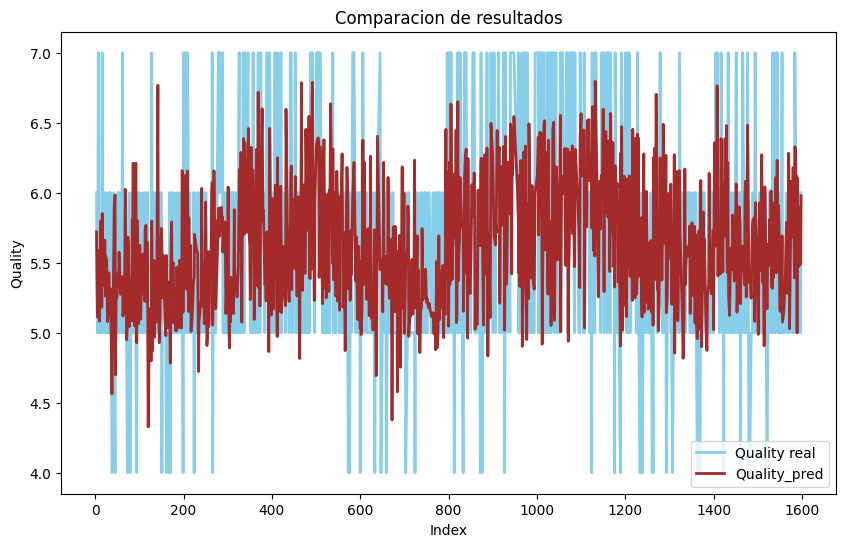

In [48]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Quality real
plt.plot(y, x1, label='Quality real', color='skyblue', linewidth=2)
# Predicciones
plt.plot(y, x2, label='Quality_pred', color='brown', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Index')
plt.ylabel('Quality')
plt.title('Comparacion de resultados')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()